In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd ..

/home/nassim/dev/conrl


In [3]:
from src.qlearning import QLearningAgent
from src.utils import EpisodeStats
from envs.gridworld import GridworldEnv

import itertools
import numpy as np

In [4]:
env = GridworldEnv()
print(env.reset())
env.render()

print(env.step(1))
env.render()

print(env.step(0))
env.render()

7
T  o  o  o
o  o  o  x
o  o  o  o
o  o  o  T
(7, -1.0, False, {'prob': 1.0})
T  o  o  o
o  o  o  x
o  o  o  o
o  o  o  T
(3, -1.0, False, {'prob': 1.0})
T  o  o  x
o  o  o  o
o  o  o  o
o  o  o  T


In [226]:
num_episodes = 200
stats = EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes),
        selector_dist=None)

q_agent = QLearningAgent(action_size=env.action_space.n, state_grid=[np.arange(env.observation_space.n-1)], gamma=0.5, alpha=1)

In [227]:
for i_episode in range(num_episodes):

    if (i_episode + 1) % 50 == 0:
        print("\rEpisode {}/{}.".format(i_episode + 1, num_episodes), end="")
        sys.stdout.flush()
    
    # Generate episode
    state = env.reset()
    state = (state, )
    for step in itertools.count():
        action = q_agent.policy(state)
        next_state, reward, done, _ = env.step(action)
        next_state = (next_state, )

        # Update statistics
        stats.episode_rewards[i_episode] += reward
        stats.episode_lengths[i_episode] = step

        # TD update
        q_agent.update(state, next_state, action, reward)
        
        if done:
            break

        state = next_state
        

Episode 200/200.

Text(0.5, 1.0, 'Episode Reward over Time')

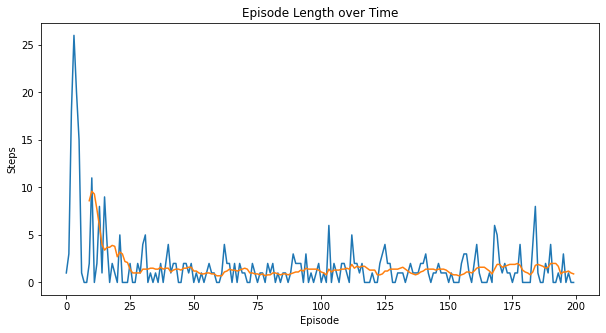

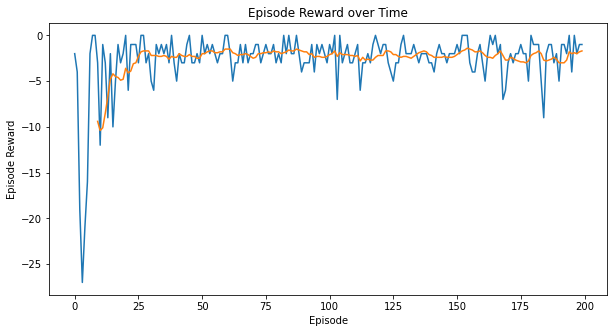

In [229]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

fig1 = plt.figure(figsize=(10,5))
plt.plot(stats.episode_lengths)
rm = pd.Series(stats.episode_lengths).rolling(10).mean()
plt.plot(rm)
plt.xlabel("Episode")
plt.ylabel("Steps")
plt.title("Episode Length over Time")

fig2 = plt.figure(figsize=(10,5))
plt.plot(stats.episode_rewards)
rm = pd.Series(stats.episode_rewards).rolling(10).mean()
plt.plot(rm)
plt.xlabel("Episode")
plt.ylabel("Episode Reward")
plt.title("Episode Reward over Time")